# Project Name: Flight Fare Prediction 

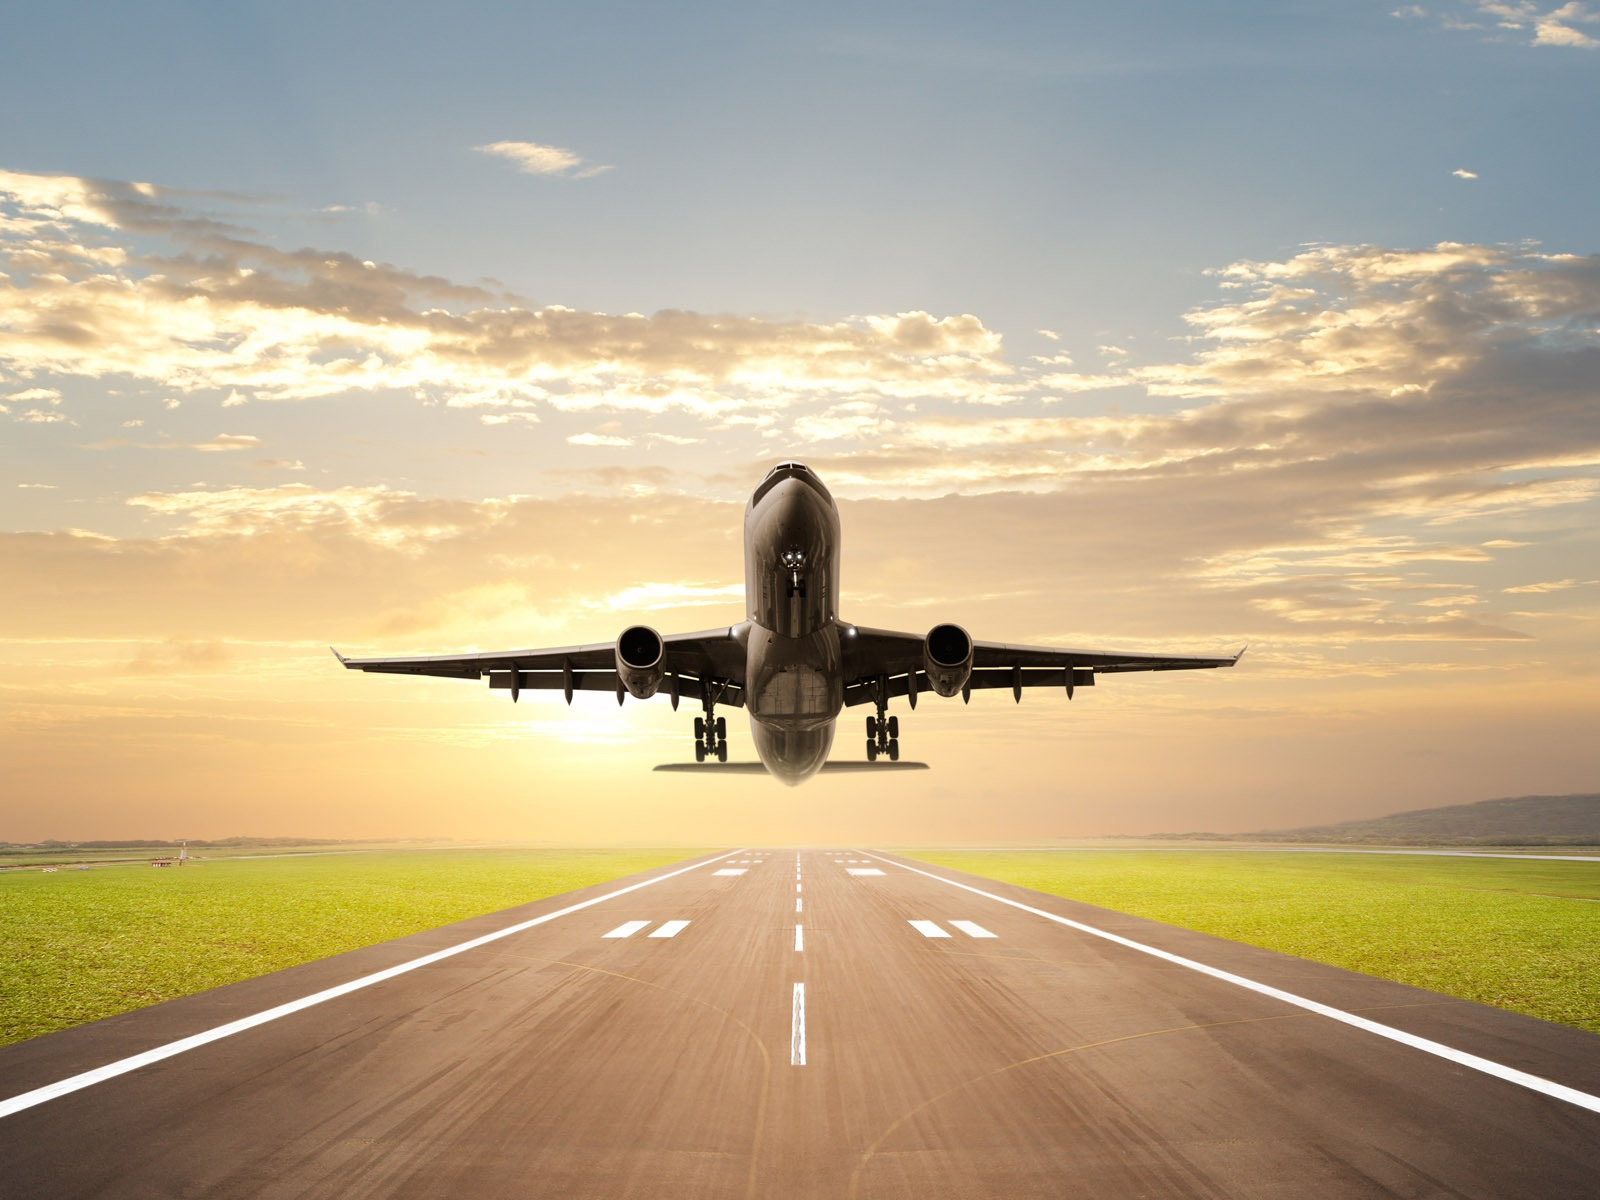

#### In this project we will be predicting the Fare of a flight a person has to give on inputting the data using the Machine Learning Algo.<br>
## Context :<br>
#### We have often heared travellers saying Flight TIckets are often very unpredictable and are very hard to guess. If one might see a  price today and checks the same flight price tommorow it's a whole different story by then. <br>
#### Let us create a Machine Learning Model which will help us in predicting the prices of a flight on inputting some of the attributes. Here we will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.<br>
### We will do the following things in our Notebook:
- Data Analysis 
- Feature Engineering 
- Feature Selection
- Model Building using ML

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('flight data.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.shape

(10683, 11)

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
def data_analysis(column):
    for i in column:
        print(df[i].value_counts())

        sns.catplot(x = i, y = 'Price', data = df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
        plt.show()

    

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64


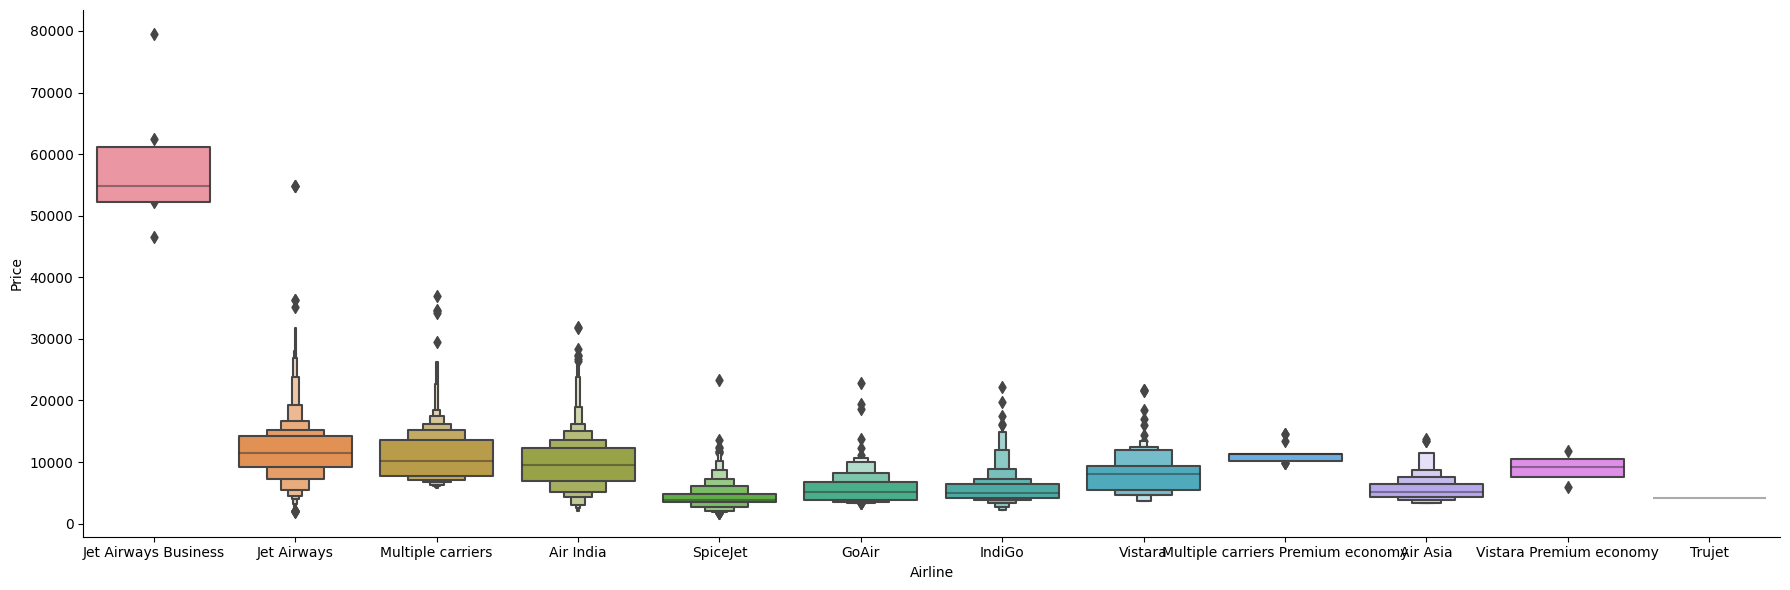

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64


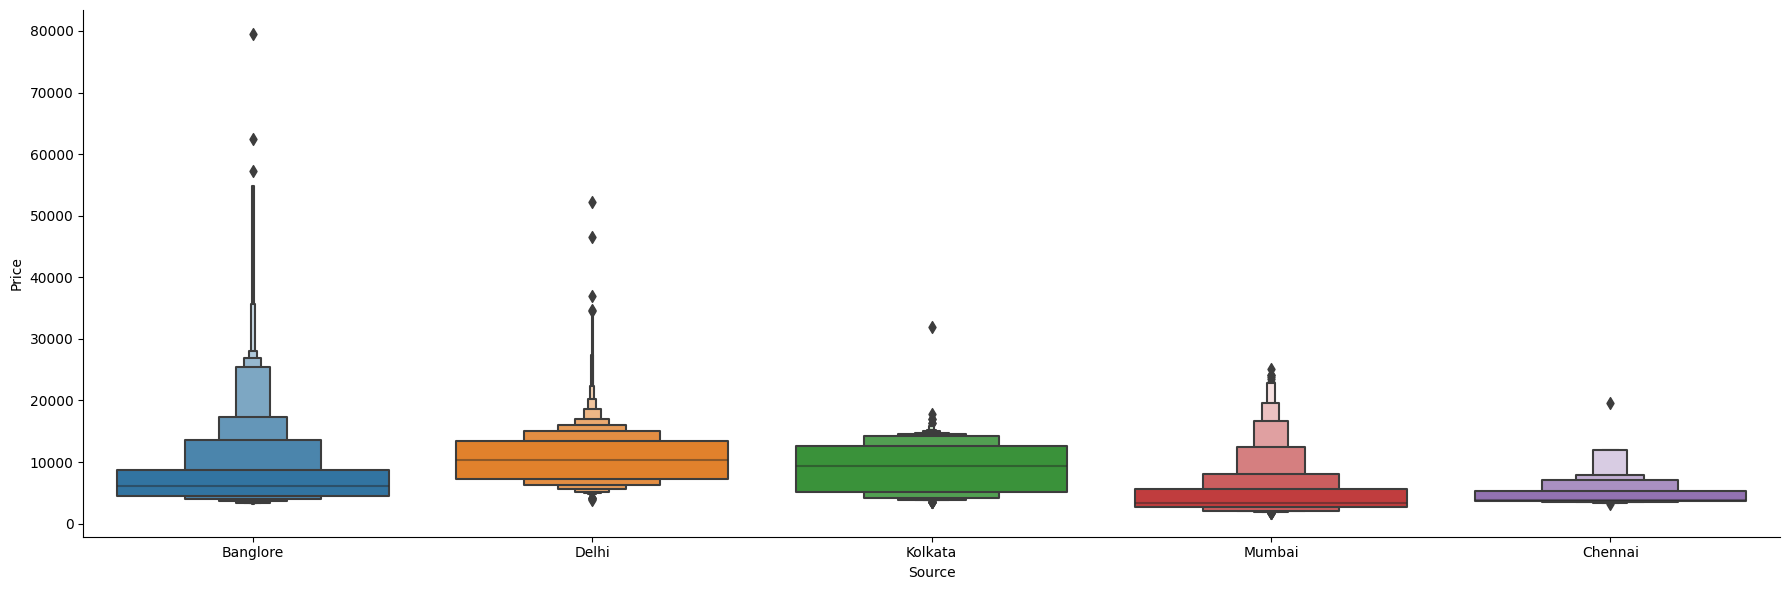

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64


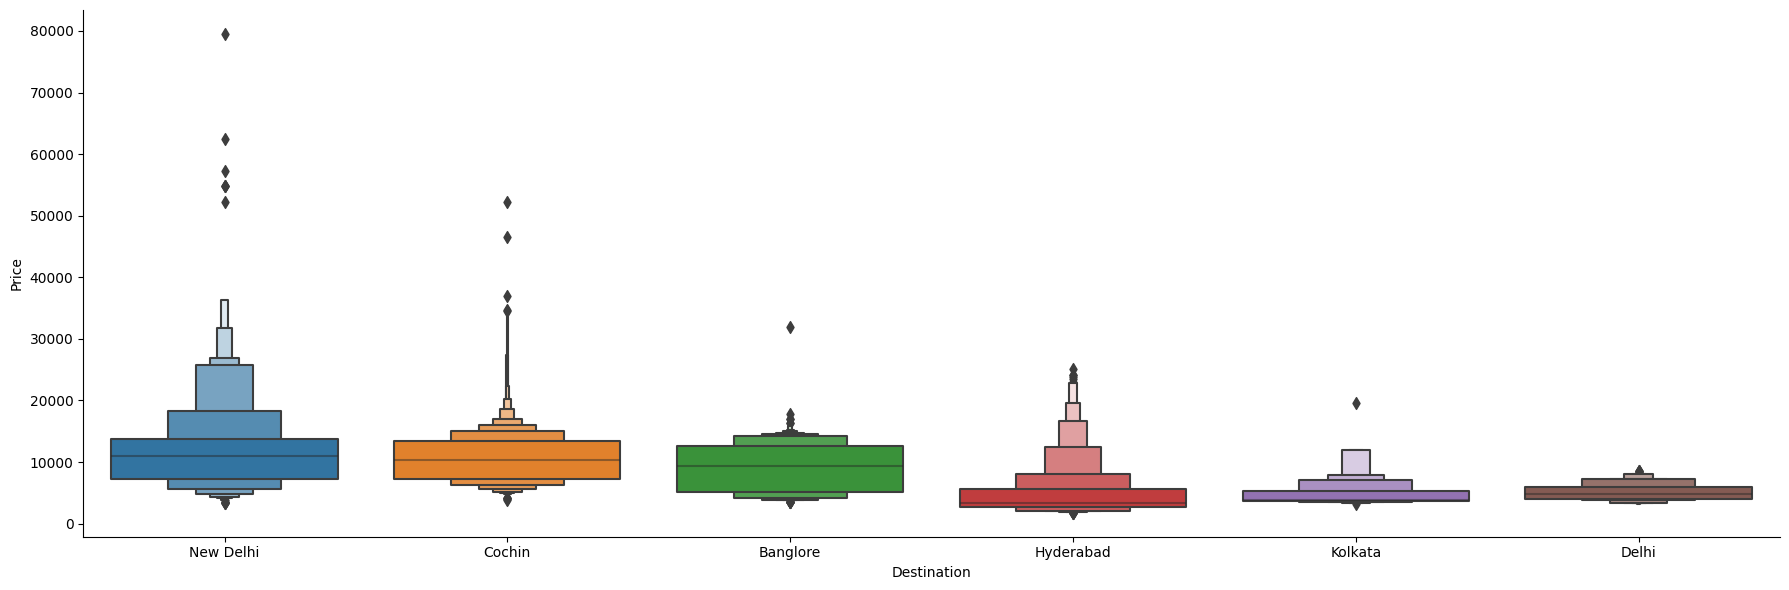

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64


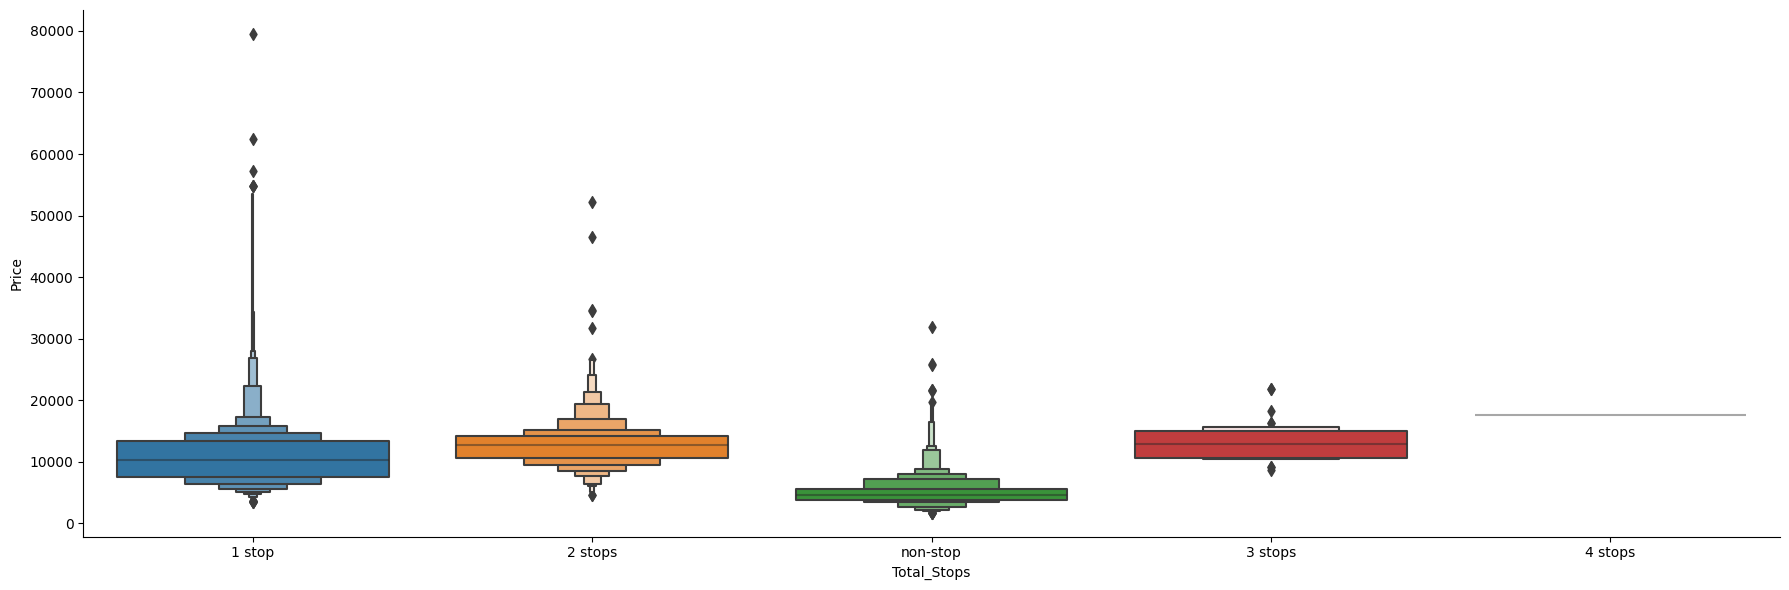

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


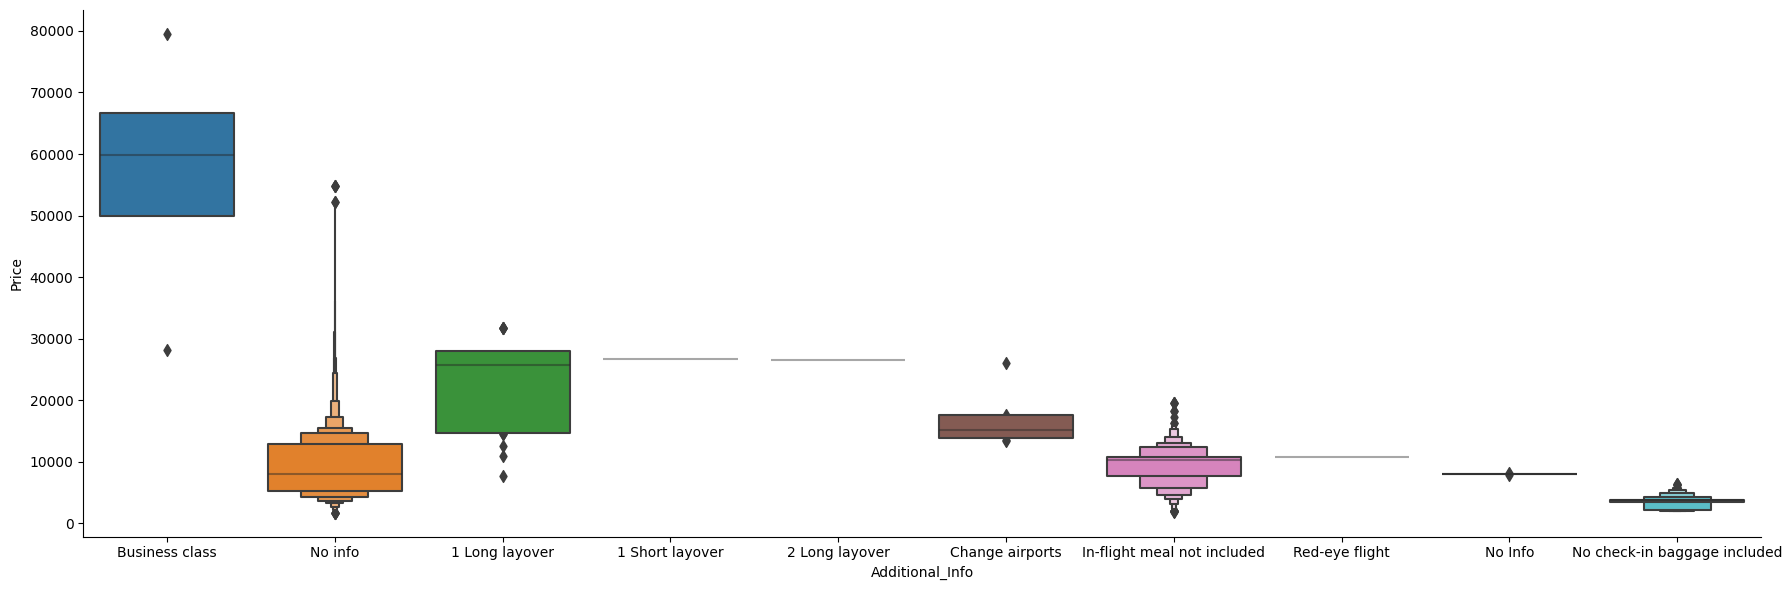

In [8]:
a = ['Airline' , 'Source','Destination' ,'Total_Stops','Additional_Info']
data_analysis(a)

In [9]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [10]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Month'] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Year'] = df['Date_of_Journey'].str.split('/').str[2].astype(int)
df.drop(['Date_of_Journey'], axis=1, inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [11]:
df['Arrival_Time'] = df['Arrival_Time'].str.split(' ').str[0]

In [12]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [13]:
df['Total_Stops'].isna().sum()

1

In [14]:
df['Total_Stops'] = df['Total_Stops'].fillna('1 stop')
df.Total_Stops.isna().sum()

0

In [15]:
df['Total_Stops'] = df['Total_Stops'].replace('non-stop' , '0 stop')
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [16]:
df['Total_Stops'] = df['Total_Stops'].str.strip(' ').str[0].astype(int)
df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,2019


In [17]:
df['Arrival_Hour'] = df['Arrival_Time'].apply(lambda x: int(x.split(':')[0]))
df['Arrival_Minute'] = df['Arrival_Time'].apply(lambda x: int(x.split(':')[1]))
df.drop(['Arrival_Time'], axis=1, inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,0,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2,No info,7662,1,5,2019,13,15


In [18]:
df['Departure_Hour'] = df['Dep_Time'].apply(lambda x : int(x.split(':')[0]))
df['Departure_Minute'] = df['Dep_Time'].apply(lambda x : int(x.split(':')[1]))
df.drop(['Dep_Time'], axis = 1, inplace = True)
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50


In [19]:
df.Route.dtype

dtype('O')

In [20]:
df['Route_1'] = df.Route.str.split('→ ').str[0]
df['Route_2'] = df.Route.str.split('→ ').str[1]
df['Route_3'] = df.Route.str.split('→ ').str[2]
df['Route_4'] = df.Route.str.split('→ ').str[3]
df['Route_5'] = df.Route.str.split('→ ').str[4]

In [21]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,NaN


In [22]:
df.Route_1.fillna('None',inplace=True)
df.Route_2.fillna('None',inplace=True)
df.Route_3.fillna('None',inplace=True)
df.Route_4.fillna('None',inplace=True)
df.Route_5.fillna('None',inplace=True)
df.drop('Route',axis=1,inplace=True)
df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None


In [23]:
df.drop('Duration',axis=1,inplace=True)
df.isna().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder

lst = ['Airline','Source','Destination','Additional_Info','Route_1','Route_2','Route_3','Route_4','Route_5']
for i in lst:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897,24,3,2019,1,10,22,20,0,13,24,12,4
1,1,3,0,2,8,7662,1,5,2019,13,15,5,50,2,25,1,3,4


In [25]:
df.drop('Year',axis=1,inplace=True)
x = df.drop('Price',axis=1)
y = df.Price

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV

In [27]:
a = x.columns
a

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [28]:
x1 = StandardScaler().fit_transform(df[a])
x = pd.DataFrame(x1, columns=x.columns)

In [29]:
x.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,-0.410675,-1.658441,2.416665,-1.220744,0.499892,1.237383,-1.467490,-1.800427,-0.890057,1.654259,-0.235050,-1.674021,0.134572,1.370755,0.408177,0.062498
1,-1.260999,0.890052,-0.973826,1.741483,0.499892,-1.475239,0.250276,-0.050851,-0.587124,-1.303095,1.363492,-0.016293,1.623320,-1.172239,-3.054719,0.062498


In [30]:
sns.set()

In [32]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 7, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3, 5,8, 10]

In [33]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [34]:
model = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_grid, cv=5, verbose=2, n_jobs=-1,scoring='neg_mean_squared_error',n_iter=50)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x ,y ,test_size=0.2,random_state=42)

In [36]:
model.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 8, 10],
                                        'min_samples_split': [2, 3, 5, 7, 10,
                                                              15, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   scoring='neg_mean_squared_error', verbose=2)

In [37]:
model.best_params_

{'n_estimators': 1300,
 'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [38]:
model = RandomForestRegressor(n_estimators=1300,
                              min_samples_leaf=1,
                              min_samples_split=7,
                              max_features='sqrt',
                              max_depth=30)

model.fit(x_train, y_train)
 

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=7,
                      n_estimators=1300)

In [39]:
y_pred = model.predict(x_test)

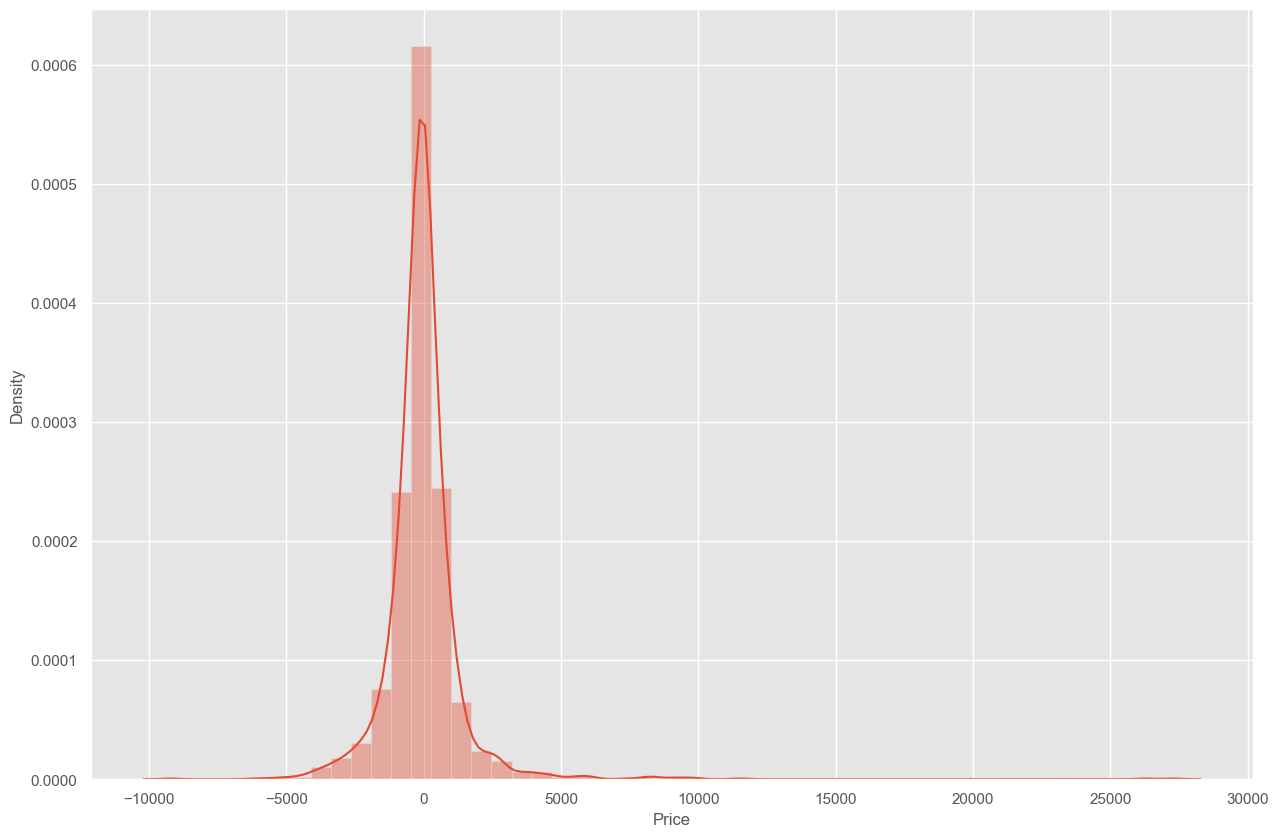

In [41]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
sns.distplot(y_test - y_pred)
plt.show()

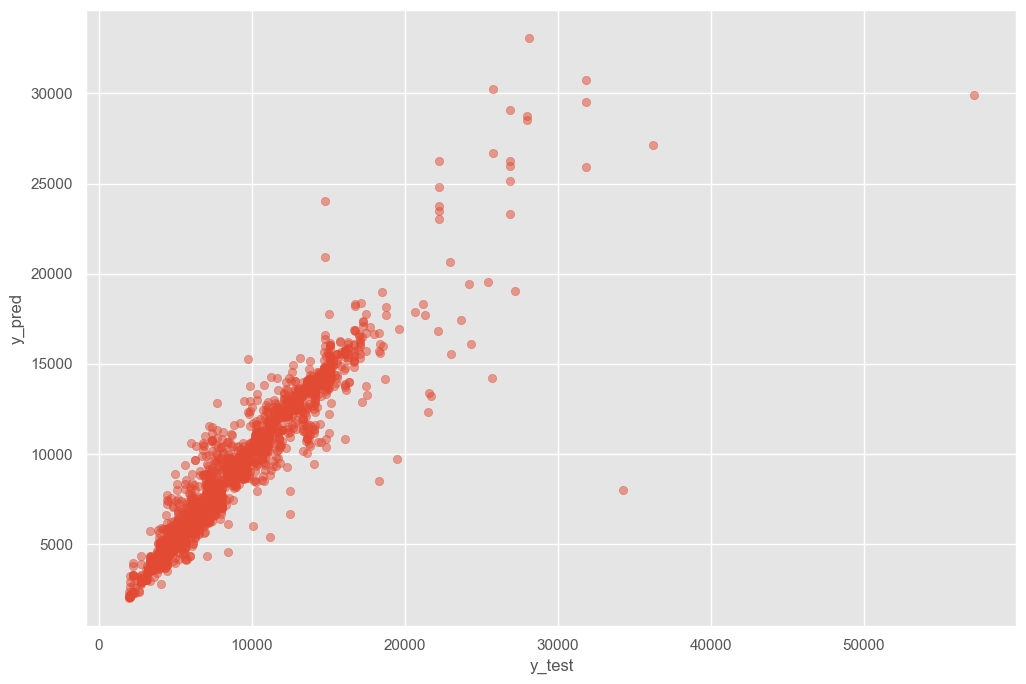

In [42]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [45]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:',round(r2_score(y_test, y_pred),2))

MAE: 774.8129575956782
MSE: 2321563.5476251342
RMSE: 1523.6677943781363
R2 Score: 0.89
